In [ ]:
# Some liks
# https://www.kaggle.com/c/titanic#
# https://www.kaggle.com/aselad/exploratory-data-analysis-on-the-titanic-dataset

# De acuerdo con la descripción de la base de datos,
# (https://www.kaggle.com/c/titanic#), la variable objetivo (y) corresponde
# a la columna 'Survived', y las variables independientes (predictores, X) son
# el resto de las columnas.

In [ ]:
import numpy as np              # numerical python
import pandas as pd             # dealing with dataframes (excel-like tables)
import matplotlib.pyplot as plt # Basic plots
import seaborn as sns           # Advanced plots. Built on top of matplotlib.

# Part 0: Load data and clean data

In [ ]:
# Load dataset
df = pd.read_csv('train-titanic.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Get rid of useless variables
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
# Print a statistical summary (for numeric variables)
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Print a summary of variables with null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Get rid of the cabin variable
df.drop(['Cabin'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# Convert categorical variables 'Sex' into a numeric one
df["Sex"] = df["Sex"].astype('category').cat.codes
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [ ]:
# Unique values
# ==Q== Encuentra la manera de mostrar los valores únicos de la variable 'Embarked'
print(df.Embarked.unique())
print(df.Embarked.value_counts())

['S' 'C' 'Q' nan]
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
# Replace nan's in Embarked variable with its mode value
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [ ]:
# Create one-hot encoding representation of Embarked variable, and add it to the
# dataframe as new columns. Then, drop the Embarked column
df = pd.concat([df, pd.get_dummies(df.Embarked)], axis=1)
df.drop(['Embarked'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,NaN,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


In [ ]:
# Print a statistical summary again up to this point
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [ ]:
# Fill in missing Age values with its own mean
df.Age.fillna(df.Age.mean(), inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

# Part 1: See distributions

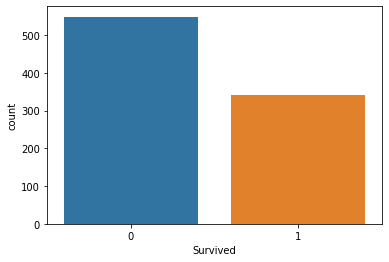

In [ ]:
# First target variable alone
sns.countplot(x='Survived', data=df)
plt.show()

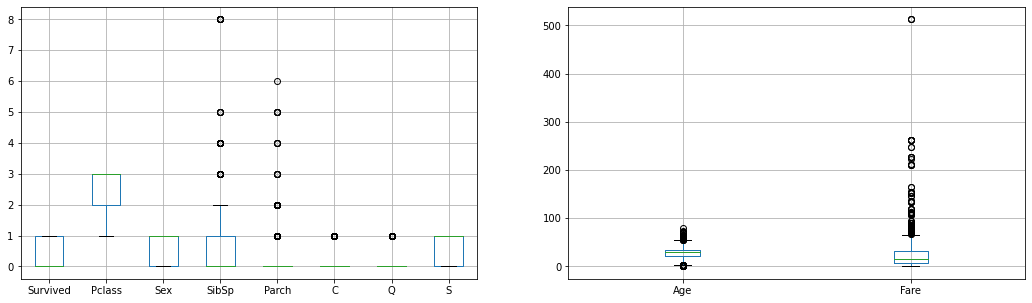

In [ ]:
# Now coarse distribution of independent variables
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S']].boxplot()
plt.subplot(1, 2, 2)
df[['Age', 'Fare']].boxplot()
plt.show()

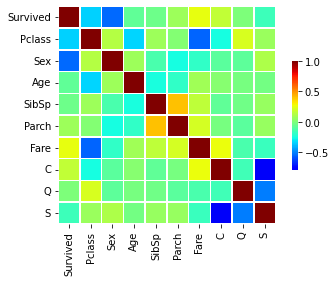

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
C           0.168240
Q           0.003650
S          -0.149683
Name: Survived, dtype: float64


In [ ]:
# Let's explore correlations between pairs of variables
corrmat = df.corr()

sns.heatmap(corrmat, center=0, cmap='jet', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print(corrmat['Survived'])

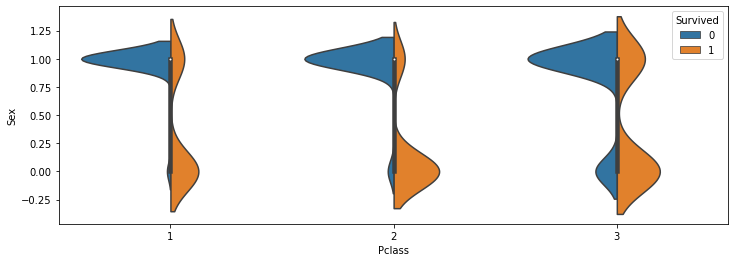

In [ ]:
# Correlation of two variables + target variable
plt.figure(figsize=(12, 4))
sns.violinplot(x='Pclass', y='Sex', hue='Survived', data=df, split=True)
plt.show()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


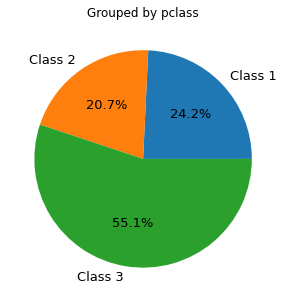

In [ ]:
# Look at the distribution of passenger-classes
pclass_count = df.groupby('Pclass')['Pclass'].count()
print(pclass_count)

plt.figure(figsize=(5, 5))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], autopct='%1.1f%%', textprops={'fontsize': 13})
plt.show()

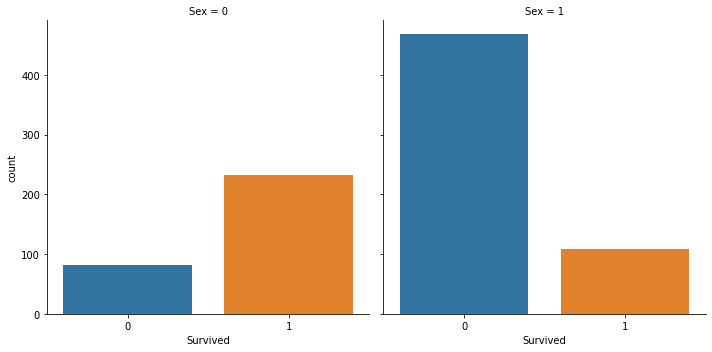

In [ ]:
# See some correlations (gender)
sns.catplot(x='Survived', col='Sex', kind='count', data=df)
plt.show()

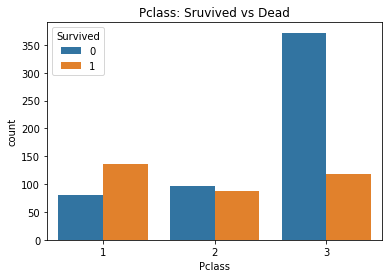

In [ ]:
# More on correlations
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

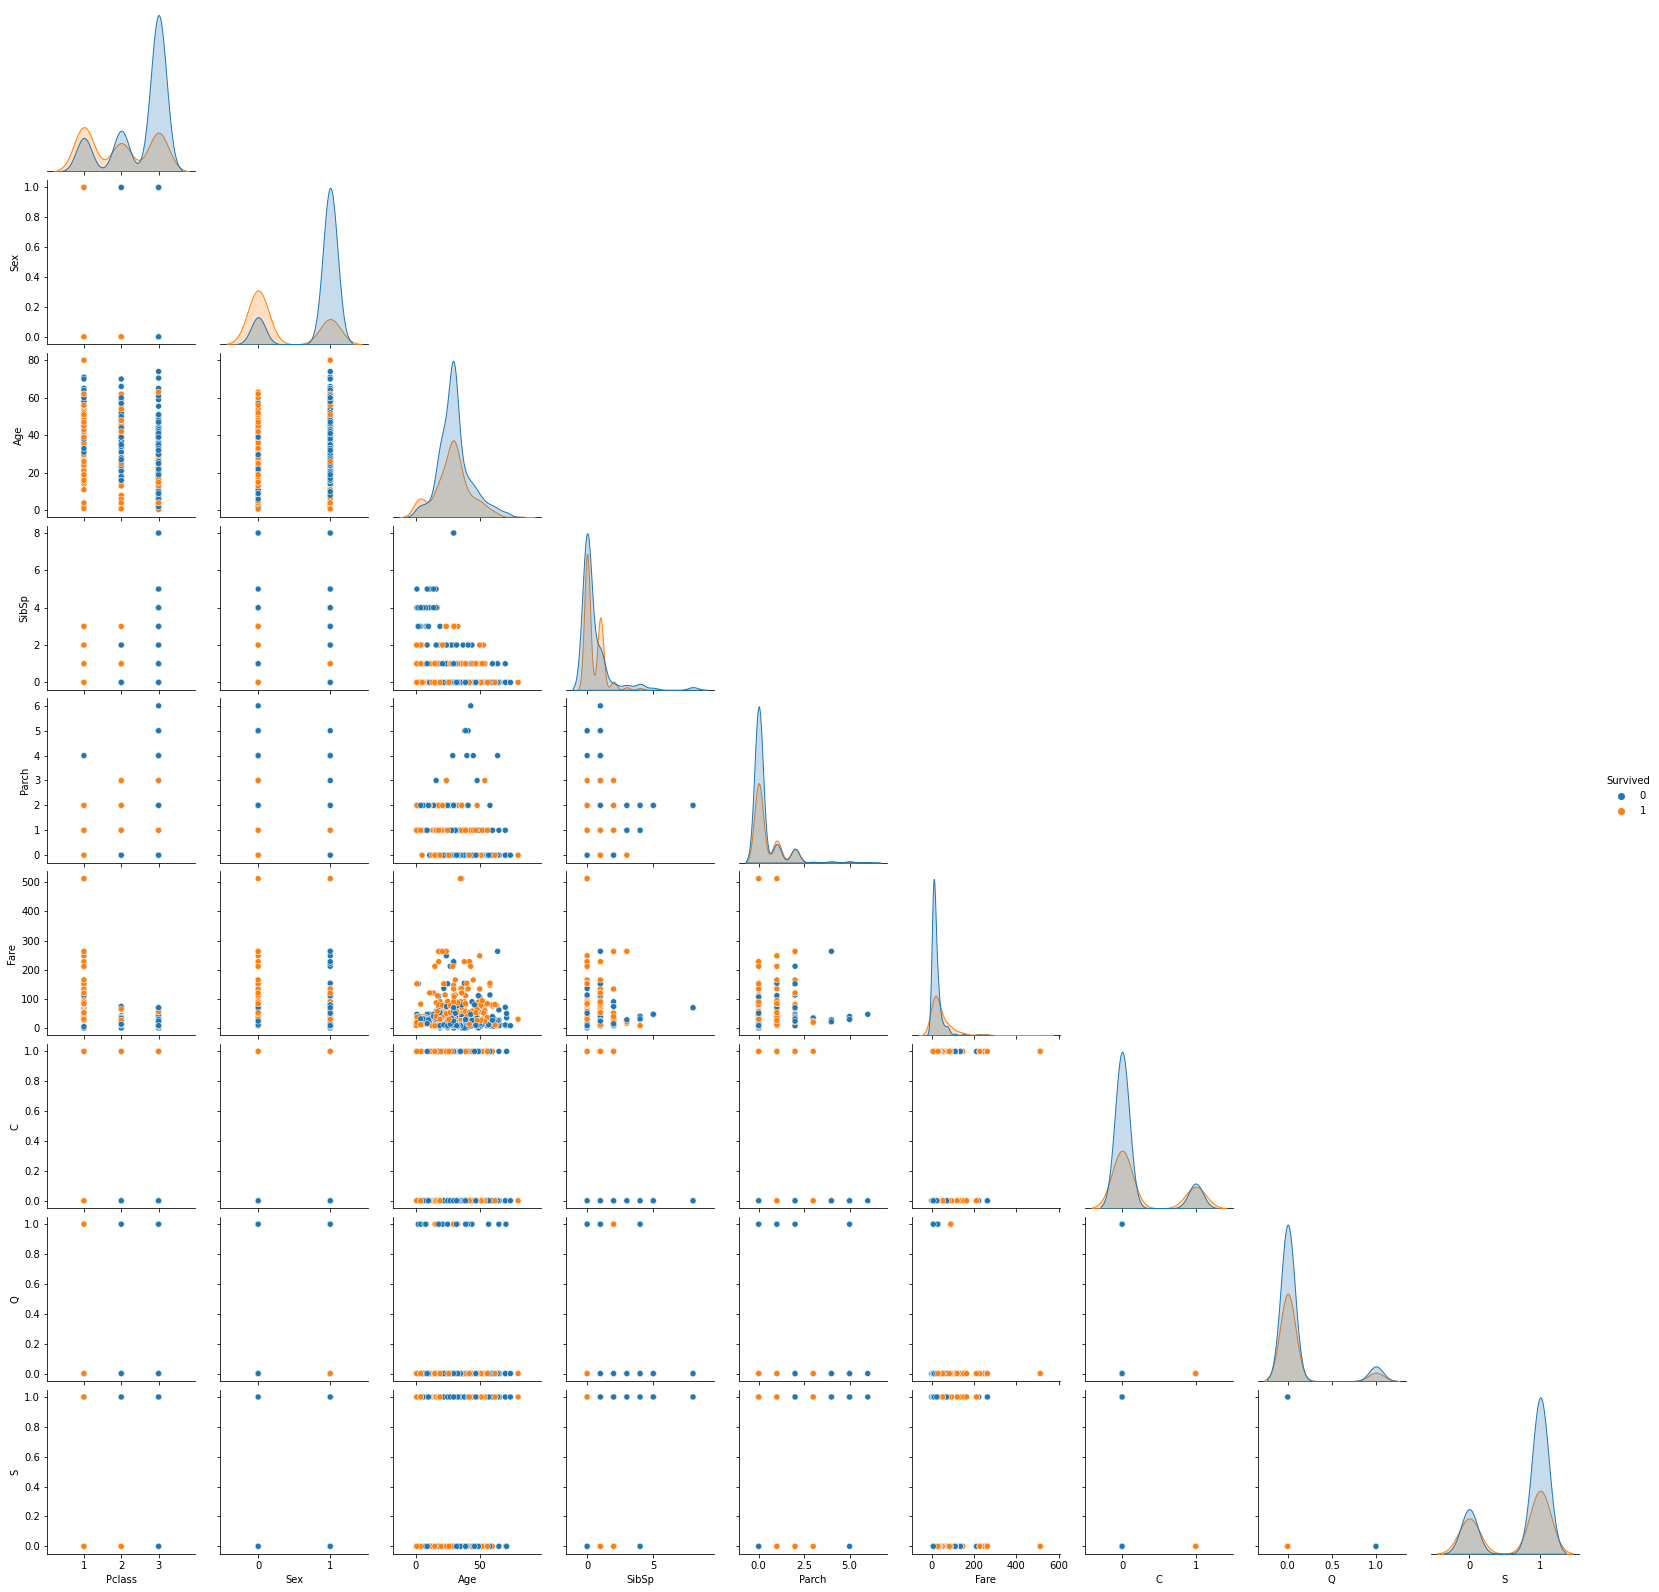

In [ ]:
# Pairwise correlation
sns.pairplot(df, hue="Survived", corner=True)
plt.show()

# Part 1.b: Let's explore some variable transformations

In [ ]:
# Log
df_log = df.copy()

df_log['Age'] = df_log['Age'].transform(lambda x: np.log(x))
df_log['Fare'] = df_log['Fare'].transform(lambda x: max(np.log(x), 0))

df_log

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,3.091042,1,0,1.981001,0,0,1
1,1,1,0,3.637586,1,0,4.266662,1,0,0
2,1,3,0,3.258097,0,0,2.070022,0,0,1
3,1,1,0,3.555348,1,0,3.972177,0,0,1
4,0,3,1,3.555348,0,0,2.085672,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,3.295837,0,0,2.564949,0,0,1
887,1,1,0,2.944439,0,0,3.401197,0,0,1
888,0,3,0,3.391117,1,2,3.154870,0,0,1
889,1,1,1,3.258097,0,0,3.401197,1,0,0


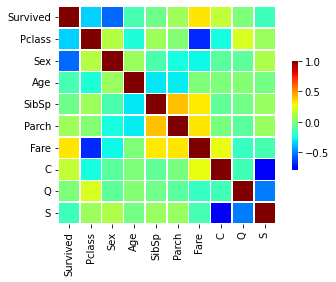

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.125056
SibSp      -0.035322
Parch       0.081629
Fare        0.331805
C           0.168240
Q           0.003650
S          -0.149683
Name: Survived, dtype: float64


In [ ]:
# Let's explore correlations between pairs of variables
corrmat_log = df_log.corr()

sns.heatmap(corrmat_log, center=0, cmap='jet', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print(corrmat_log['Survived'])

In [ ]:
# Square
df_square = df.copy()

df_square = df_square.transform(lambda x: x**2)
df_square

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,9,1,484.000000,1,0,52.562500,0,0,1
1,1,1,0,1444.000000,1,0,5081.308859,1,0,0
2,1,9,0,676.000000,0,0,62.805625,0,0,1
3,1,1,0,1225.000000,1,0,2819.610000,0,0,1
4,0,9,1,1225.000000,0,0,64.802500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,4,1,729.000000,0,0,169.000000,0,0,1
887,1,1,0,361.000000,0,0,900.000000,0,0,1
888,0,9,0,882.037589,1,4,549.902500,0,0,1
889,1,1,1,676.000000,0,0,900.000000,1,0,0


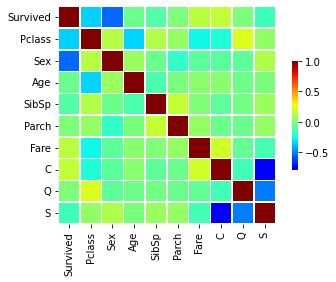

Survived    1.000000
Pclass     -0.339693
Sex        -0.543351
Age        -0.041374
SibSp      -0.094248
Parch       0.004417
Fare        0.148614
C           0.168240
Q           0.003650
S          -0.149683
Name: Survived, dtype: float64


In [ ]:
# Let's explore correlations between pairs of variables
corrmat_square = df_square.corr()

sns.heatmap(corrmat_square, center=0, cmap='jet', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print(corrmat_square['Survived'])

In [ ]:
# Square root
df_squareroot = df.copy()

df_squareroot = df_squareroot.transform(lambda x: np.sqrt(x))
df_squareroot

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.0,1.732051,1.0,4.690416,1.0,0.000000,2.692582,0.0,0.0,1.0
1,1.0,1.000000,0.0,6.164414,1.0,0.000000,8.442944,1.0,0.0,0.0
2,1.0,1.732051,0.0,5.099020,0.0,0.000000,2.815138,0.0,0.0,1.0
3,1.0,1.000000,0.0,5.916080,1.0,0.000000,7.286975,0.0,0.0,1.0
4,0.0,1.732051,1.0,5.916080,0.0,0.000000,2.837252,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.414214,1.0,5.196152,0.0,0.000000,3.605551,0.0,0.0,1.0
887,1.0,1.000000,0.0,4.358899,0.0,0.000000,5.477226,0.0,0.0,1.0
888,0.0,1.732051,0.0,5.449690,1.0,1.414214,4.842520,0.0,0.0,1.0
889,1.0,1.000000,1.0,5.099020,0.0,0.000000,5.477226,1.0,0.0,0.0


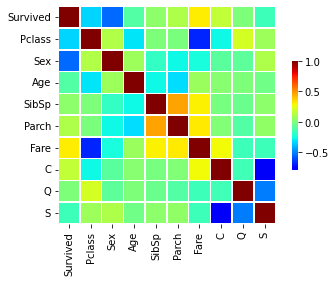

Survived    1.000000
Pclass     -0.335898
Sex        -0.543351
Age        -0.096101
SibSp       0.043535
Parch       0.121652
Fare        0.312508
C           0.168240
Q           0.003650
S          -0.149683
Name: Survived, dtype: float64


In [ ]:
# Let's explore correlations between pairs of variables
corrmat_squareroot = df_squareroot.corr()

sns.heatmap(corrmat_squareroot, center=0, cmap='jet', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print(corrmat_squareroot['Survived'])

In [ ]:
# Cubic root
df_cubicroot = df.copy()

df_cubicroot = df_cubicroot.transform(lambda x: np.cbrt(x))
df_cubicroot

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.0,1.442250,1.0,2.802039,1.0,0.000000,1.935438,0.0,0.0,1.0
1,1.0,1.000000,0.0,3.361975,1.0,0.000000,4.146318,1.0,0.0,0.0
2,1.0,1.442250,0.0,2.962496,0.0,0.000000,1.993730,0.0,0.0,1.0
3,1.0,1.000000,0.0,3.271066,1.0,0.000000,3.758647,0.0,0.0,1.0
4,0.0,1.442250,1.0,3.271066,0.0,0.000000,2.004158,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.259921,1.0,3.000000,0.0,0.000000,2.351335,0.0,0.0,1.0
887,1.0,1.000000,0.0,2.668402,0.0,0.000000,3.107233,0.0,0.0,1.0
888,0.0,1.442250,0.0,3.096810,1.0,1.259921,2.862294,0.0,0.0,1.0
889,1.0,1.000000,1.0,2.962496,0.0,0.000000,3.107233,1.0,0.0,0.0


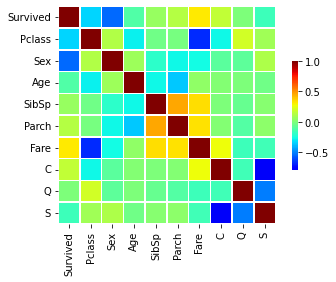

Survived    1.000000
Pclass     -0.334725
Sex        -0.543351
Age        -0.106143
SibSp       0.071084
Parch       0.132108
Fare        0.322398
C           0.168240
Q           0.003650
S          -0.149683
Name: Survived, dtype: float64


In [ ]:
# Let's explore correlations between pairs of variables
corrmat_cubicroot = df_cubicroot.corr()

sns.heatmap(corrmat_cubicroot, center=0, cmap='jet', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print(corrmat_cubicroot['Survived'])

In [ ]:
# Engineering
df_engin = df.copy()

df_engin['x1'] = df_engin['Pclass'] * df_engin['Sex']
df_engin['x2'] = df_engin['Age'] * df_engin['Sex']
df_engin['x3'] = df_engin['Fare'] * df_engin['Sex']
df_engin['x4'] = (df_engin['SibSp'] + df_engin['Parch']) * df_engin['Sex']

df_engin

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,x1,x2,x3,x4
0,0,3,1,22.000000,1,0,7.2500,0,0,1,3,22.0,7.25,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0,0,0.0,0.00,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1,0,0.0,0.00,0
3,1,1,0,35.000000,1,0,53.1000,0,0,1,0,0.0,0.00,0
4,0,3,1,35.000000,0,0,8.0500,0,0,1,3,35.0,8.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1,2,27.0,13.00,0
887,1,1,0,19.000000,0,0,30.0000,0,0,1,0,0.0,0.00,0
888,0,3,0,29.699118,1,2,23.4500,0,0,1,0,0.0,0.00,0
889,1,1,1,26.000000,0,0,30.0000,1,0,0,1,26.0,30.00,0


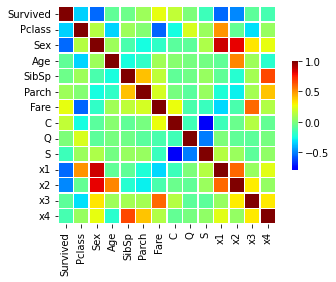

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
C           0.168240
Q           0.003650
S          -0.149683
x1         -0.542493
x2         -0.481722
x3         -0.075536
x4         -0.124549
Name: Survived, dtype: float64


In [ ]:
# Let's explore correlations between pairs of variables
corrmat_engin = df_engin.corr()

sns.heatmap(corrmat_engin, center=0, cmap='jet', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print(corrmat_engin['Survived'])

In [ ]:
# Let's compare the results of all four transformations, and use the best ones
pd.DataFrame([corrmat['Survived'], corrmat_log['Survived'], corrmat_square['Survived'],
              corrmat_squareroot['Survived'], corrmat_cubicroot['Survived'],
              corrmat_engin['Survived']],
             index=['', 'log', '^2', '^(1/2)', '^(1/3)', 'Engin'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,x1,x2,x3,x4
,1.0,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.16824,0.00365,-0.149683,NaN,NaN,NaN,NaN
log,1.0,-0.338481,-0.543351,-0.125056,-0.035322,0.081629,0.331805,0.16824,0.00365,-0.149683,NaN,NaN,NaN,NaN
^2,1.0,-0.339693,-0.543351,-0.041374,-0.094248,0.004417,0.148614,0.16824,0.00365,-0.149683,NaN,NaN,NaN,NaN
^(1/2),1.0,-0.335898,-0.543351,-0.096101,0.043535,0.121652,0.312508,0.16824,0.00365,-0.149683,NaN,NaN,NaN,NaN
^(1/3),1.0,-0.334725,-0.543351,-0.106143,0.071084,0.132108,0.322398,0.16824,0.00365,-0.149683,NaN,NaN,NaN,NaN
Engin,1.0,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.16824,0.00365,-0.149683,-0.542493,-0.481722,-0.075536,-0.124549


In [ ]:
# Keep best transformations
df_transformed = df.copy()

df_transformed.Pclass = df_square.Pclass
df_transformed.Age = df_log.Age
df_transformed.SibSp = df_square.SibSp
df_transformed.Parch = df_cubicroot.Parch
df_transformed.Fare = df_log.Fare
df_transformed['x1'] = df_engin['x1']
df_transformed['x2'] = df_engin['x2']
df_transformed['x3'] = df_engin['x3']
df_transformed['x4'] = df_engin['x4']

df_transformed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,x1,x2,x3,x4
0,0,9,1,3.091042,1,0.000000,1.981001,0,0,1,3,22.0,7.25,1
1,1,1,0,3.637586,1,0.000000,4.266662,1,0,0,0,0.0,0.00,0
2,1,9,0,3.258097,0,0.000000,2.070022,0,0,1,0,0.0,0.00,0
3,1,1,0,3.555348,1,0.000000,3.972177,0,0,1,0,0.0,0.00,0
4,0,9,1,3.555348,0,0.000000,2.085672,0,0,1,3,35.0,8.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,4,1,3.295837,0,0.000000,2.564949,0,0,1,2,27.0,13.00,0
887,1,1,0,2.944439,0,0.000000,3.401197,0,0,1,0,0.0,0.00,0
888,0,9,0,3.391117,1,1.259921,3.154870,0,0,1,0,0.0,0.00,0
889,1,1,1,3.258097,0,0.000000,3.401197,1,0,0,1,26.0,30.00,0


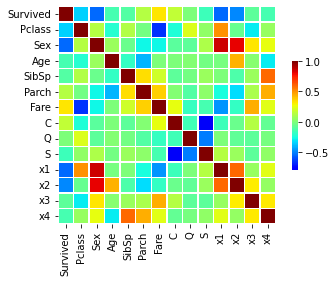

Survived    1.000000
Pclass     -0.339693
Sex        -0.543351
Age        -0.125056
SibSp      -0.094248
Parch       0.132108
Fare        0.331805
C           0.168240
Q           0.003650
S          -0.149683
x1         -0.542493
x2         -0.481722
x3         -0.075536
x4         -0.124549
Name: Survived, dtype: float64


In [ ]:
# Let's explore correlations between pairs of variables
corrmat_transformed = df_transformed.corr()

sns.heatmap(corrmat_transformed, center=0, cmap='jet', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print(corrmat_transformed['Survived'])

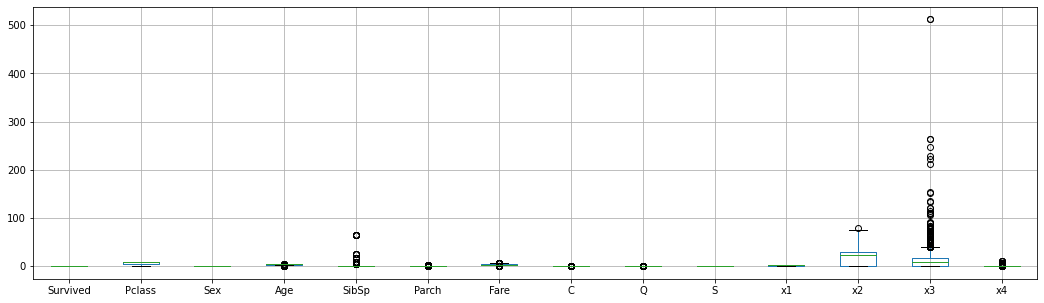

In [ ]:
# Now coarse distribution of independent variables
plt.figure(figsize=(18, 5))
df_transformed.boxplot()
plt.show()

# Part 2: Split train and test sets

In [ ]:
# Split train test sets
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_transformed, test_size=0.2)
print(df_train.shape)
print(df_test.shape)

(712, 14)
(179, 14)


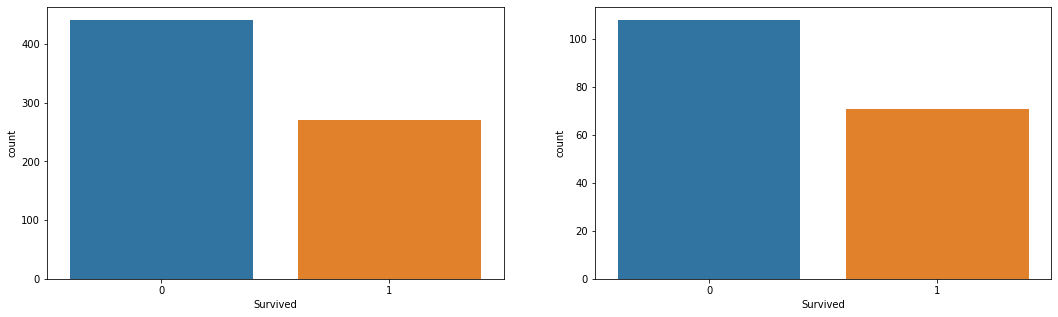

In [ ]:
# Verify consistency of distributions: target variable
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=df_train)
plt.subplot(1, 2, 2)
sns.countplot(x='Survived', data=df_test)
plt.show()

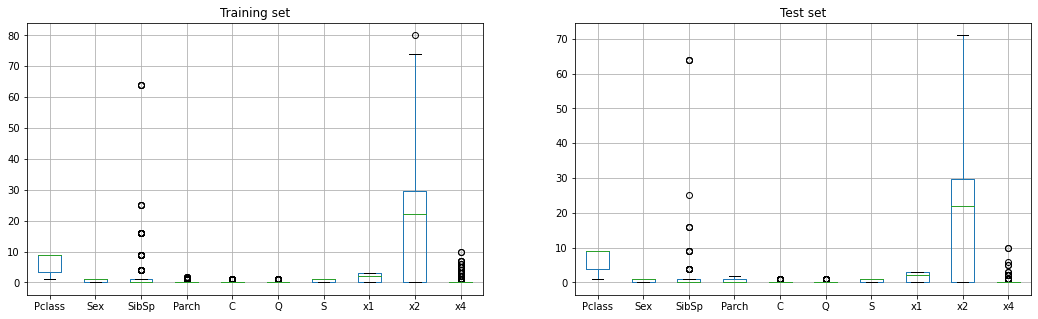

In [ ]:
# Verify consistency of distributions: independet variable
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.title('Training set')
df_train[['Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S', 'x1', 'x2', 'x4']].boxplot()
#plt.ylim((-1, 10))
plt.subplot(1, 2, 2)
plt.title('Test set')
df_test[['Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S', 'x1', 'x2', 'x4']].boxplot()
#plt.ylim((-1, 10))
plt.show()

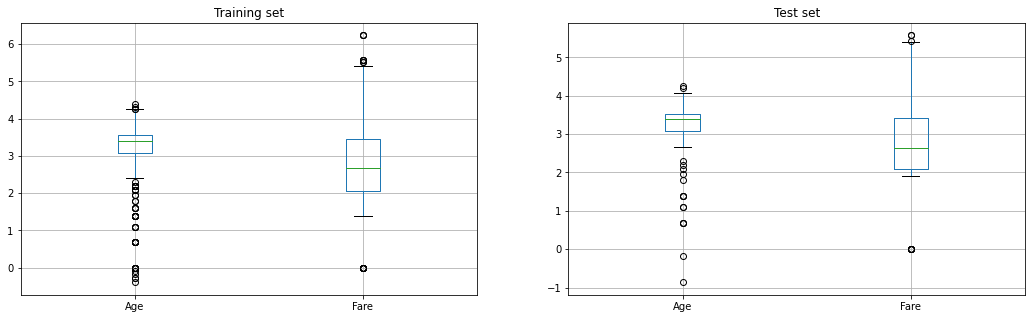

In [ ]:
# Verify consistency of distributions: independent variable
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.title('Training set')
df_train[['Age', 'Fare']].boxplot()
plt.subplot(1, 2, 2)
plt.title('Test set')
df_test[['Age', 'Fare']].boxplot()
plt.show()

# Part 3: Train a classifier

In [ ]:
# Extract data as matrices
x_train = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
                    'S', 'x1', 'x2', 'x3', 'x4']].to_numpy()
y_train = df_train[['Survived']].to_numpy()
print(x_train.shape)
print(y_train.shape)

x_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
                  'S', 'x1', 'x2', 'x3', 'x4']].to_numpy()
y_test = df_test[['Survived']].to_numpy()
print(x_test.shape)
print(y_test.shape)

(712, 13)
(712, 1)
(179, 13)
(179, 1)


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Train a regressor to approximate missing value
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid_hyp_params = {'penalty': ['l1', 'l2', 'elastic', 'None'],
                   'C': np.logspace(-7, 4, 12),
                   'l1_ratio': np.arange(0., 1.1, 0.1),
                   'class_weight': ['balanced', 'None']
                  }
gs = GridSearchCV(LogisticRegression(solver='saga'), grid_hyp_params)

gs.fit(x_train, y_train)

print(f"Best score: {gs.best_score_:.3f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.809
Best params: {'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': 0.0, 'penalty': 'l2'}


In [ ]:
# Result without choosing correlations = 0.69
# Result without feature engineering = 0.78

In [ ]:
# Report accuracy on the training and test sets
from sklearn.metrics import accuracy_score as acc

print(f"Accuracy on the training set: {acc(gs.best_estimator_.predict(x_train), y_train):.3f}")
print(f"Accuracy on the test set: {acc(gs.best_estimator_.predict(x_test), y_test):.3f}")

Accuracy on the training set: 0.809
Accuracy on the test set: 0.799


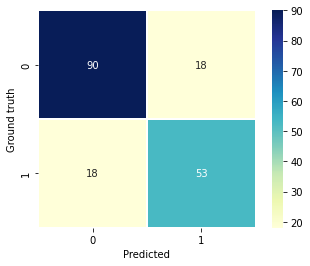

In [ ]:
# Look at the confussion matrix
from sklearn.metrics import confusion_matrix

y_test_hat = gs.best_estimator_.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_test_hat)
sns.heatmap(cf_matrix, cmap='YlGnBu', linewidths=1, annot=True, square=True)
plt.xlabel('Predicted')
plt.ylabel('Ground truth')
plt.show()

In [ ]:
# See more classification results
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_hat, target_names=['Not survided', 'Survived']))

              precision    recall  f1-score   support

Not survided       0.83      0.83      0.83       108
    Survived       0.75      0.75      0.75        71

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Part 4: Let's try again, with data scaling

In [ ]:
# Train scaler and scale data
from sklearn.preprocessing import RobustScaler, StandardScaler

scaler = StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

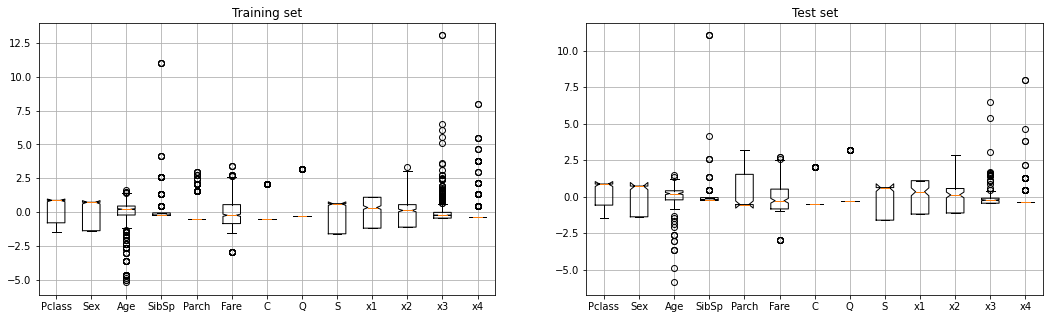

In [ ]:
# See again at their distributions
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.title('Training set')
plt.boxplot(x_train_scaled, notch=True)
plt.xticks(range(1, 14), df_transformed.columns[1:])
plt.grid()
plt.subplot(1, 2, 2)
plt.title('Test set')
plt.boxplot(x_test_scaled, notch=True)
plt.xticks(range(1, 14), df_transformed.columns[1:])
plt.grid()
plt.show()

In [ ]:
# Train a regressor to approximate missing value
grid_hyp_params = {'penalty': ['l1', 'l2', 'elastic', 'None'],
                   'C': np.logspace(-7, 4, 12),
                   'l1_ratio': np.arange(0., 1.1, 0.1),
                   'class_weight': ['balanced', 'None']
                  }
gs = GridSearchCV(LogisticRegression(solver='saga'), grid_hyp_params)

gs.fit(x_train_scaled, y_train)

print(f"Best score: {gs.best_score_:.3f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.815
Best params: {'C': 1000.0, 'class_weight': 'None', 'l1_ratio': 0.30000000000000004, 'penalty': 'l2'}


In [ ]:
# Report accuracy on the training and test sets
print(f"Accuracy on the training set: {acc(gs.best_estimator_.predict(x_train_scaled), y_train):.3f}")
print(f"Accuracy on the test set: {acc(gs.best_estimator_.predict(x_test_scaled), y_test):.3f}")

Accuracy on the training set: 0.831
Accuracy on the test set: 0.810


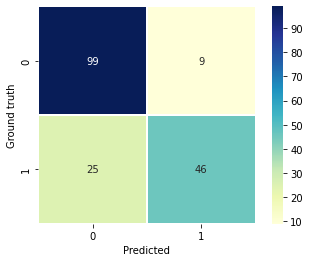

In [ ]:
# Look at the confussion matrix
y_test_hat = gs.best_estimator_.predict(x_test_scaled)
cf_matrix = confusion_matrix(y_test, y_test_hat)
sns.heatmap(cf_matrix, cmap='YlGnBu', linewidths=1, annot=True, square=True)
plt.xlabel('Predicted')
plt.ylabel('Ground truth')
plt.show()

# Part 5: Again, normalizing data vectors

In [ ]:
# Normalize vectors independently
from sklearn.preprocessing import normalize

x_train_scaled_norm = normalize(x_train_scaled)
x_test_scaled_norm = normalize(x_test_scaled)

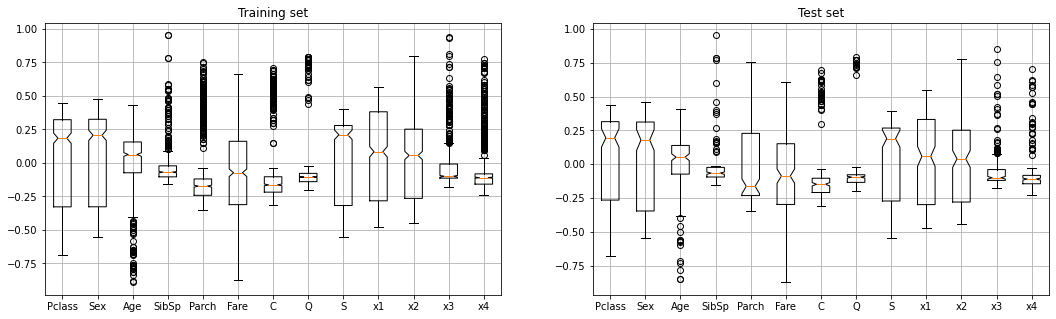

In [ ]:
# See again at their distributions
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.title('Training set')
plt.boxplot(x_train_scaled_norm, notch=True)
plt.xticks(range(1, 14), df_transformed.columns[1:])
plt.grid()
plt.subplot(1, 2, 2)
plt.title('Test set')
plt.boxplot(x_test_scaled_norm, notch=True)
plt.xticks(range(1, 14), df_transformed.columns[1:])
plt.grid()
plt.show()

In [ ]:
# Train a regressor to approximate missing value
grid_hyp_params = {'penalty': ['l1', 'l2', 'elastic', 'None'],
                   'C': np.logspace(-7, 4, 12),
                   'l1_ratio': np.arange(0., 1.1, 0.1),
                   'class_weight': ['balanced', 'None']
                  }
gs = GridSearchCV(LogisticRegression(solver='saga'), grid_hyp_params)

gs.fit(x_train_scaled_norm, y_train)

print(f"Best score: {gs.best_score_:.3f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.816
Best params: {'C': 100.0, 'class_weight': 'None', 'l1_ratio': 0.0, 'penalty': 'l1'}


In [ ]:
# Report accuracy on the training and test sets
print(f"Accuracy on the training set: {acc(gs.best_estimator_.predict(x_train_scaled_norm), y_train):.3f}")
print(f"Accuracy on the test set: {acc(gs.best_estimator_.predict(x_test_scaled_norm), y_test):.3f}")

Accuracy on the training set: 0.829
Accuracy on the test set: 0.827
